In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("C:/Users/User/Desktop/Joined-Tables.csv")
df.head()

,CustomerID,Name,Gender,Age,Region,PlanType,SignupDate,AvgDataGB,AvgMinutes,AvgSMS,AvgAmountCharged,UnpaidCount,Churned,ChurnDate,TotalTickets
0,C0001,Customer_1,M,49,Kisumu,Family,2023-12-15,2.02,1266.00,139.50,29.49,24,0,-,2
1,C0002,Customer_2,F,56,Eldoret,Prepaid,2023-04-03,8.71,543.83,77.67,34.41,12,0,-,1
2,C0003,Customer_3,M,49,Nairobi,Prepaid,2022-03-24,4.99,725.17,68.50,28.61,24,0,-,2
3,C0004,Customer_4,M,21,Eldoret,Prepaid,2022-05-25,2.06,696.17,101.17,23.10,0,0,-,2
4,C0005,Customer_5,M,47,Nakuru,Family,2022-03-26,4.46,1219.83,107.00,33.26,0,0,-,1


In [16]:
df.drop(['CustomerID', 'Name', 'SignupDate', 'ChurnDate'], axis=1, inplace=True, errors='ignore')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Region', 'PlanType'], drop_first=True)

scaler = StandardScaler()
numerical_cols = ['Age', 'AvgDataGB', 'AvgMinutes', 'AvgSMS', 'AvgAmountCharged', 'UnpaidCount', 'TotalTickets']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

X = df_encoded.drop('Churned', axis=1)
y = df_encoded['Churned']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

Accuracy: 0.825
Precision: 0.333
Recall: 0.167
F1 Score: 0.222


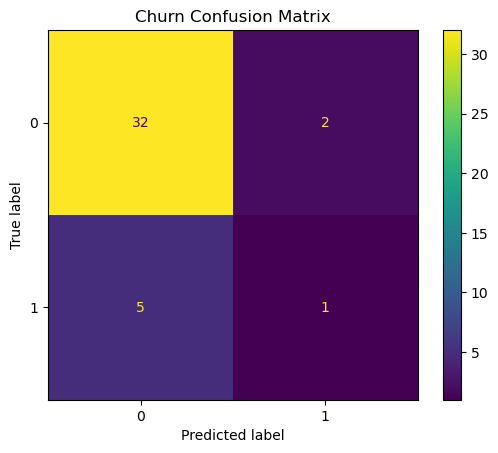

In [19]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Churn Confusion Matrix")
plt.grid(False)
plt.show()

True Negatives (TN): Didn't churn & predicted not to

False Positives (FP): Didn't churn but predicted as churn

False Negatives (FN): Churned but predicted not to

True Positives (TP): Churned & predicted churn